load a structure from the pdb and display it; enable an interactive view of the data

In [1]:
import nglview as nv
import pytraj as pt
traj = pt.load('./material/simple_data/3pqr.pdb')
view = nv.show_pytraj(traj)
view

NGLWidget()

this will be useful, just have to work out how to fill it with data

In [2]:
import ipyvolume as ipv
import numpy as np
x, y, z = np.random.random((3, 10000))
v = np.random.random((50,10000))
ipv.quickscatter(x, y, z, size=v, marker="sphere")

# Managing dataset

TODO: pre-load full dataset (.tiff or .mrcs) into hdf5 so we can access efficiently

the idea would be to consider a dataset as an immuable object that we access without rewriting new files. 
For example, say an experiment consists of 1000 4000x4000 micrographs, this is stored in a single hdf5 file, and each particle has 3 coordinates (micrograph number and pixel origin) a box size and a binning value.


# Load mrcs particles stacks

In [39]:
import os
import mrcfile
datadir = '/gpfs/slac/cryo/fs1/g/ML/cryoEM-notebooks/data/20181005-rib-TEM4/Extract/extract_one_2dclass/Micrographs'

In [40]:
mrcsfile = datadir+'/Hasan_00871_aligned_DW.mrcs'

In [41]:
with mrcfile.open(mrcsfile) as mrc:
    data = mrc.data
data.shape

(9, 540, 540)

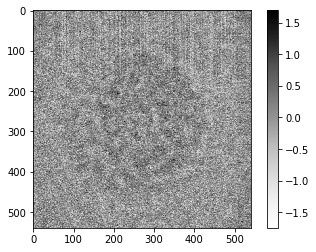

In [45]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.imshow(np.mean(data,axis=0),cmap='Greys')
plt.colorbar()